In [41]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import neighbors

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
for i in range(100):
    df['MedInc'].iloc[i] = np.nan
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,NaN,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,NaN,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,NaN,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [53]:
df.isnull().sum()

MedInc        100
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
target          0
dtype: int64

In [54]:
df.fillna(df['MedInc'].mean(),inplace=True)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, shuffle=True, test_size=0.3)

In [31]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14448, 8), (6192, 8), (14448,), (6192,))

K= 1 , Rmse= 1.2257661856816717
K= 2 , Rmse= 1.1076775744199736
K= 3 , Rmse= 1.0590534703412613
K= 4 , Rmse= 1.0369475741623388
K= 5 , Rmse= 1.0199344810136433
K= 6 , Rmse= 1.015996682021788
K= 7 , Rmse= 1.016466975384414
K= 8 , Rmse= 1.0166313487240406
K= 9 , Rmse= 1.0158522964237398
K= 10 , Rmse= 1.01680265508691
K= 11 , Rmse= 1.0178055119943892
K= 12 , Rmse= 1.018431664707752
K= 13 , Rmse= 1.0205853702323522
K= 14 , Rmse= 1.0220037483922089
K= 15 , Rmse= 1.0231138657750078
K= 16 , Rmse= 1.0241940164624932
K= 17 , Rmse= 1.0272097728796317
K= 18 , Rmse= 1.029395592624161
K= 19 , Rmse= 1.0312617118265819
K= 20 , Rmse= 1.033534926819488
----------------------------------------
best_k :  9


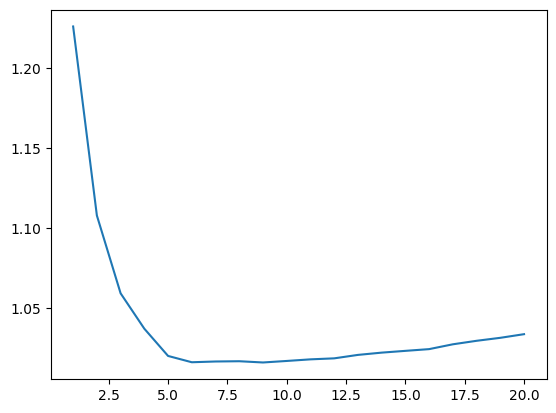

In [36]:
best_mse = 10000
rmse = []
k_list = []
for K in range(20):
    K = K+1
    k_list.append(K)
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance',p=1) 
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mse = sqrt(mean_squared_error(y_val, pred))
    rmse.append(mse)
    print('K=',K,',','Rmse=',mse)
    if best_mse > mse:
        best_mse = mse
        best_k = K
print('-'*40)
print('best_k : ',best_k)
plt.plot(k_list,rmse)

In [55]:
for i in range(100):
    df['MedInc'].iloc[i] = np.nan

df.fillna(0,inplace=True)

K= 1 , Rmse= 1.2190479846217903
K= 2 , Rmse= 1.0783000026258378
K= 3 , Rmse= 1.0269763654013013
K= 4 , Rmse= 1.0044252678852723
K= 5 , Rmse= 0.994188255655619
K= 6 , Rmse= 0.9869611633334973
K= 7 , Rmse= 0.9865541338333821
K= 8 , Rmse= 0.9869710987006869
K= 9 , Rmse= 0.9868529994270315
K= 10 , Rmse= 0.9843163752609714
K= 11 , Rmse= 0.9859873264764035
K= 12 , Rmse= 0.988044984254598
K= 13 , Rmse= 0.9900808719115828
K= 14 , Rmse= 0.990700203330205
K= 15 , Rmse= 0.9917751539612523
K= 16 , Rmse= 0.9926104198779417
K= 17 , Rmse= 0.9938544691185115
K= 18 , Rmse= 0.9951206425237791
K= 19 , Rmse= 0.996625201223935
K= 20 , Rmse= 0.9982780209625465
----------------------------------------
best_k :  10


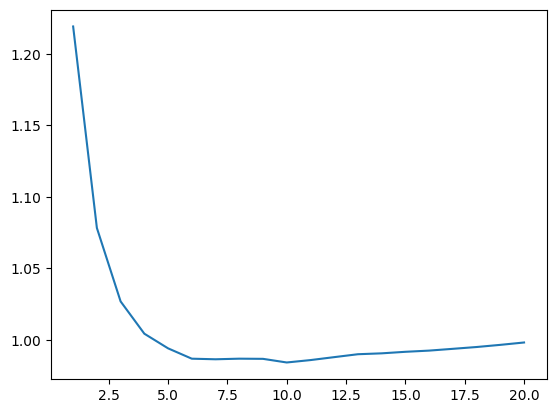

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, shuffle=True, test_size=0.3)

best_mse = 10000
rmse = []
k_list = []
for K in range(20):
    K = K+1
    k_list.append(K)
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance',p=1) 
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mse = sqrt(mean_squared_error(y_val, pred))
    rmse.append(mse)
    print('K=',K,',','Rmse=',mse)
    if best_mse > mse:
        best_mse = mse
        best_k = K
print('-'*40)
print('best_k : ',best_k)
plt.plot(k_list,rmse)

In [59]:
from sklearn.impute import KNNImputer
for i in range(100):
    df['MedInc'].iloc[i] = np.nan
imputer = KNNImputer(n_neighbors = 1)
df_copy_imp = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

K= 1 , Rmse= 1.2212735565883193
K= 2 , Rmse= 1.079835988735548
K= 3 , Rmse= 1.0282772015394814
K= 4 , Rmse= 1.0057650764825194
K= 5 , Rmse= 0.9956043628805026
K= 6 , Rmse= 0.9893856857565448
K= 7 , Rmse= 0.9874912220263816
K= 8 , Rmse= 0.9860142473480684
K= 9 , Rmse= 0.9849006824858337
K= 10 , Rmse= 0.9868194692804412
K= 11 , Rmse= 0.9869978587535524
K= 12 , Rmse= 0.9877096937470766
K= 13 , Rmse= 0.9902164889995969
K= 14 , Rmse= 0.992067226173914
K= 15 , Rmse= 0.9932308576599188
K= 16 , Rmse= 0.9947861287521862
K= 17 , Rmse= 0.9962359360772868
K= 18 , Rmse= 0.9965663972087523
K= 19 , Rmse= 0.9983332970063892
K= 20 , Rmse= 1.000215655247171
----------------------------------------
best_k :  9


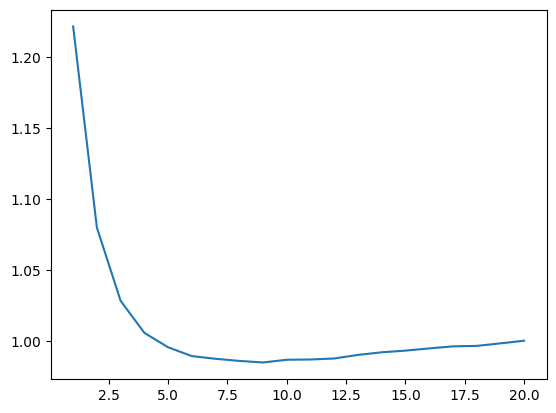

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, shuffle=True, test_size=0.3)

best_mse = 10000
rmse = []
k_list = []
for K in range(20):
    K = K+1
    k_list.append(K)
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance',p=1) 
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mse = sqrt(mean_squared_error(y_val, pred))
    rmse.append(mse)
    print('K=',K,',','Rmse=',mse)
    if best_mse > mse:
        best_mse = mse
        best_k = K
print('-'*40)
print('best_k : ',best_k)
plt.plot(k_list,rmse)